# EDA

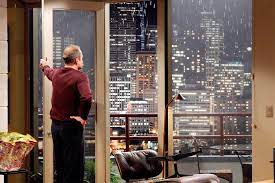

In [1]:
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import psycopg2

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)




## Code to connect for SQL

In [3]:
import os # provides functions for interacting with operating system
from dotenv import load_dotenv # reads key-value pairs from a .env file and can set them as environment variables

load_dotenv() # takes environment variables from .env

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

In [4]:
# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)



## SQL command for data extraction

In [5]:
query_string = """
 
SELECT 
    kchd.*,              
    kchs.price,         
    kchs.date,
    kchs.id
FROM 
    eda.king_county_house_details kchd
INNER JOIN 
    eda.king_county_house_sales kchs 
    ON kchd.id = kchs.house_id
WHERE 
    (kchd.bathrooms > 4                         
    AND (kchd.sqft_lot > kchd.sqft_lot15
    or kchd.sqft_living > kchd.sqft_living15)
    AND kchd.waterfront = 0)  
ORDER BY
    kchd.id, kchs.house_id;

"""
df_main = pd.read_sql(query_string, conn)
df_main


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,date,id
0,42000130,5.000,4.500,4440.000,9784.000,2.000,0.000,0.000,3,10,...,2012,0.000,98168,47.470,-122.275,2720.000,10080.000,600000.000,2014-09-24,6384
1,98000130,4.000,5.000,4630.000,24054.000,2.000,0.000,3.000,3,11,...,2005,0.000,98075,47.587,-121.966,4630.000,17584.000,1430000.000,2015-03-24,15899
2,98001070,5.000,4.250,4610.000,13252.000,2.000,0.000,4.000,3,11,...,2004,0.000,98075,47.588,-121.969,4400.000,15154.000,1170000.000,2014-08-18,12418
3,117000001,4.000,4.250,1960.000,3565.000,2.000,0.000,0.000,3,7,...,1940,20030.000,98116,47.585,-122.384,1920.000,5750.000,540000.000,2014-05-27,8725
4,125059138,6.000,4.500,3300.000,7561.000,2.000,0.000,0.000,3,8,...,1980,NaN,98052,47.679,-122.104,2470.000,7561.000,510000.000,2014-07-22,7645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,9325200110,5.000,4.250,3380.000,7805.000,2.000,0.000,0.000,3,8,...,2014,0.000,98148,47.435,-122.328,2790.000,7805.000,569950.000,2014-09-09,8001
217,9359100750,4.000,4.500,3080.000,10550.000,2.000,0.000,3.000,3,8,...,1976,20070.000,98040,47.581,-122.244,2780.000,10550.000,1400000.000,2014-10-31,2844
218,9412400185,4.000,4.500,4750.000,13912.000,2.000,0.000,2.000,3,10,...,2005,0.000,98118,47.533,-122.265,3600.000,22124.000,1310000.000,2014-06-19,5113
219,9471200200,4.000,4.250,5040.000,16048.000,1.000,0.000,3.000,3,10,...,1950,NaN,98105,47.670,-122.260,3960.000,14000.000,2530000.000,2015-03-25,2039


## Cleaning the data
### Changing date data to datetime

In [6]:
#df_main.dtypes
df_main.date = pd.to_datetime(df_main.date)
df_main

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,date,id
0,42000130,5.000,4.500,4440.000,9784.000,2.000,0.000,0.000,3,10,...,2012,0.000,98168,47.470,-122.275,2720.000,10080.000,600000.000,2014-09-24,6384
1,98000130,4.000,5.000,4630.000,24054.000,2.000,0.000,3.000,3,11,...,2005,0.000,98075,47.587,-121.966,4630.000,17584.000,1430000.000,2015-03-24,15899
2,98001070,5.000,4.250,4610.000,13252.000,2.000,0.000,4.000,3,11,...,2004,0.000,98075,47.588,-121.969,4400.000,15154.000,1170000.000,2014-08-18,12418
3,117000001,4.000,4.250,1960.000,3565.000,2.000,0.000,0.000,3,7,...,1940,20030.000,98116,47.585,-122.384,1920.000,5750.000,540000.000,2014-05-27,8725
4,125059138,6.000,4.500,3300.000,7561.000,2.000,0.000,0.000,3,8,...,1980,NaN,98052,47.679,-122.104,2470.000,7561.000,510000.000,2014-07-22,7645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,9325200110,5.000,4.250,3380.000,7805.000,2.000,0.000,0.000,3,8,...,2014,0.000,98148,47.435,-122.328,2790.000,7805.000,569950.000,2014-09-09,8001
217,9359100750,4.000,4.500,3080.000,10550.000,2.000,0.000,3.000,3,8,...,1976,20070.000,98040,47.581,-122.244,2780.000,10550.000,1400000.000,2014-10-31,2844
218,9412400185,4.000,4.500,4750.000,13912.000,2.000,0.000,2.000,3,10,...,2005,0.000,98118,47.533,-122.265,3600.000,22124.000,1310000.000,2014-06-19,5113
219,9471200200,4.000,4.250,5040.000,16048.000,1.000,0.000,3.000,3,10,...,1950,NaN,98105,47.670,-122.260,3960.000,14000.000,2530000.000,2015-03-25,2039


### Getting info about cell types

In [7]:

df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             221 non-null    int64         
 1   bedrooms       221 non-null    float64       
 2   bathrooms      221 non-null    float64       
 3   sqft_living    221 non-null    float64       
 4   sqft_lot       221 non-null    float64       
 5   floors         221 non-null    float64       
 6   waterfront     221 non-null    float64       
 7   view           220 non-null    float64       
 8   condition      221 non-null    int64         
 9   grade          221 non-null    int64         
 10  sqft_above     221 non-null    float64       
 11  sqft_basement  218 non-null    float64       
 12  yr_built       221 non-null    int64         
 13  yr_renovated   180 non-null    float64       
 14  zipcode        221 non-null    int64         
 15  lat            221 non-

#### Changing the cell types to int and removing Nan's and filling them

In [8]:
df_main.yr_renovated =  df_main.yr_renovated/10
df_main[['yr_renovated', 
         'sqft_basement', 
         'view']] = df_main[['yr_renovated', 'sqft_basement', 'view']].fillna(0)
df_main.loc[df_main.yr_renovated == 0,'yr_renovated'] = df_main.loc[df_main.yr_renovated == 0,'yr_built']
df_main.yr_renovated = df_main.yr_renovated.astype(int)
df_main.waterfront = df_main.waterfront.astype(int)
df_main

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,date,id
0,42000130,5.000,4.500,4440.000,9784.000,2.000,0,0.000,3,10,...,2012,2012,98168,47.470,-122.275,2720.000,10080.000,600000.000,2014-09-24,6384
1,98000130,4.000,5.000,4630.000,24054.000,2.000,0,3.000,3,11,...,2005,2005,98075,47.587,-121.966,4630.000,17584.000,1430000.000,2015-03-24,15899
2,98001070,5.000,4.250,4610.000,13252.000,2.000,0,4.000,3,11,...,2004,2004,98075,47.588,-121.969,4400.000,15154.000,1170000.000,2014-08-18,12418
3,117000001,4.000,4.250,1960.000,3565.000,2.000,0,0.000,3,7,...,1940,2003,98116,47.585,-122.384,1920.000,5750.000,540000.000,2014-05-27,8725
4,125059138,6.000,4.500,3300.000,7561.000,2.000,0,0.000,3,8,...,1980,1980,98052,47.679,-122.104,2470.000,7561.000,510000.000,2014-07-22,7645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,9325200110,5.000,4.250,3380.000,7805.000,2.000,0,0.000,3,8,...,2014,2014,98148,47.435,-122.328,2790.000,7805.000,569950.000,2014-09-09,8001
217,9359100750,4.000,4.500,3080.000,10550.000,2.000,0,3.000,3,8,...,1976,2007,98040,47.581,-122.244,2780.000,10550.000,1400000.000,2014-10-31,2844
218,9412400185,4.000,4.500,4750.000,13912.000,2.000,0,2.000,3,10,...,2005,2005,98118,47.533,-122.265,3600.000,22124.000,1310000.000,2014-06-19,5113
219,9471200200,4.000,4.250,5040.000,16048.000,1.000,0,3.000,3,10,...,1950,1950,98105,47.670,-122.260,3960.000,14000.000,2530000.000,2015-03-25,2039


In [10]:
df_main_sort = df_main.sort_values(by='yr_built')
df_main_client = df_main[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
         'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'price']]

In [143]:
df_main_client['age'] = 2020 - df_main_client['yr_built']
df_main_client['ratio_living_lot'] = df_main_client.sqft_lot / df_main_client.sqft_living
df_main_client['ratio_living_lot_n'] = df_main_client.sqft_lot15 / df_main_client.sqft_living15

In [144]:
df_data_u65 = df_main_client[ (df_main_client.yr_built <=1965)]


In [145]:
df_data_u65.sort_values('age', ascending = False)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price,age,ratio_living_lot,ratio_living_lot_n
65,5.000,4.250,4860.000,9453.000,1.500,5,10,3100.000,1760.000,1905,3150.000,8557.000,2250000.000,115,1.945,2.717
150,4.000,4.250,6410.000,43838.000,2.500,4,12,5610.000,800.000,1906,2270.000,6630.000,2730000.000,114,6.839,2.921
84,4.000,4.250,3650.000,5328.000,1.500,3,9,2330.000,1320.000,1907,1710.000,3600.000,1520000.000,113,1.460,2.105
173,4.000,4.250,4960.000,6000.000,2.500,3,11,3680.000,1280.000,1909,2160.000,4080.000,1430000.000,111,1.210,1.889
85,6.000,4.750,5540.000,7200.000,2.500,4,11,3950.000,1590.000,1909,2930.000,7200.000,2630000.000,111,1.300,2.457
214,4.000,4.500,3780.000,6000.000,2.000,4,11,2770.000,1010.000,1910,2660.000,6000.000,1600000.000,110,1.587,2.256
178,7.000,4.500,6210.000,8856.000,2.500,5,11,4760.000,1450.000,1910,2940.000,5400.000,3200000.000,110,1.426,1.837
171,6.000,8.000,12050.000,27600.000,2.500,4,13,8570.000,3480.000,1910,3940.000,8800.000,7700000.000,110,2.290,2.234
220,9.000,4.500,3650.000,5000.000,2.000,3,8,2530.000,1120.000,1915,2510.000,5000.000,1280000.000,105,1.370,1.992
165,6.000,4.500,4230.000,6420.000,2.000,4,8,2360.000,1870.000,1916,3450.000,4085.000,1470000.000,104,1.518,1.184


In [25]:
bath_gr = df_data_u65.groupby('bathrooms')[['price', 'sqft_lot', 'sqft_living', 'sqft_living15','sqft_lot15', 'age']].median().reset_index()
grade_gr = df_data_u65.groupby('grade')[['price', 'sqft_lot', 'sqft_living', 'sqft_living15','sqft_lot15', 'age']].median().reset_index()

In [26]:
bath_gr.sort_values('age')


,bathrooms,price,sqft_lot,sqft_living,sqft_living15,sqft_lot15,age
7,6.250,2890000.000,64033.000,8670.000,4140.000,81021.000,55.000
8,6.750,800000.000,41664.000,7480.000,2810.000,33190.000,67.000
4,5.250,1680000.000,18707.000,4830.000,2880.000,10520.000,68.000
5,5.500,2530000.000,45100.000,6930.000,2560.000,37766.000,70.000
6,5.750,540000.000,7647.000,3700.000,2510.000,7479.000,72.000
0,4.250,1080000.000,8750.000,3670.000,2160.000,8557.000,76.000
2,4.750,2505000.000,12090.000,4992.500,3825.000,9073.500,86.000
3,5.000,3200000.000,18200.000,7100.000,3130.000,6477.000,87.000
1,4.500,989000.000,7260.000,3830.000,2510.000,6291.000,94.000
9,8.000,7700000.000,27600.000,12050.000,3940.000,8800.000,110.000


In [27]:
df_data_u65[['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'price']] = \
    df_data_u65[['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'price']].astype(int)

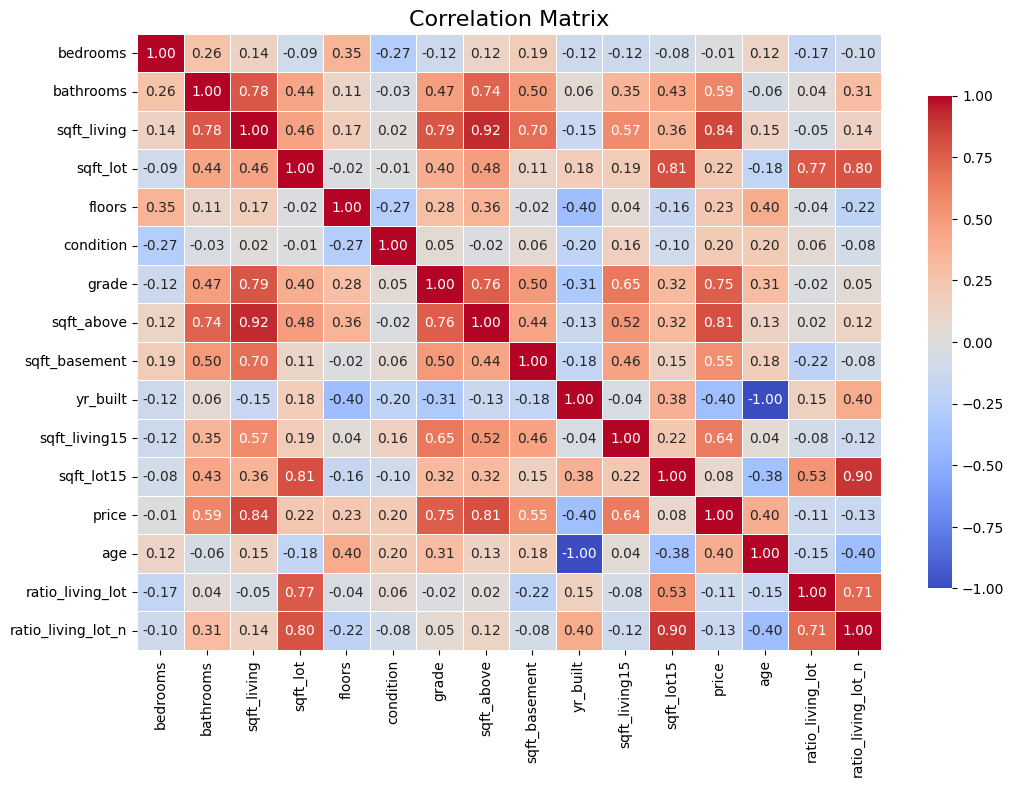

In [148]:

correlation_matrix = df_data_u65.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix", fontsize=16)
plt.savefig('correlation_matrix.png', dpi=1000, bbox_inches='tight')
plt.show()


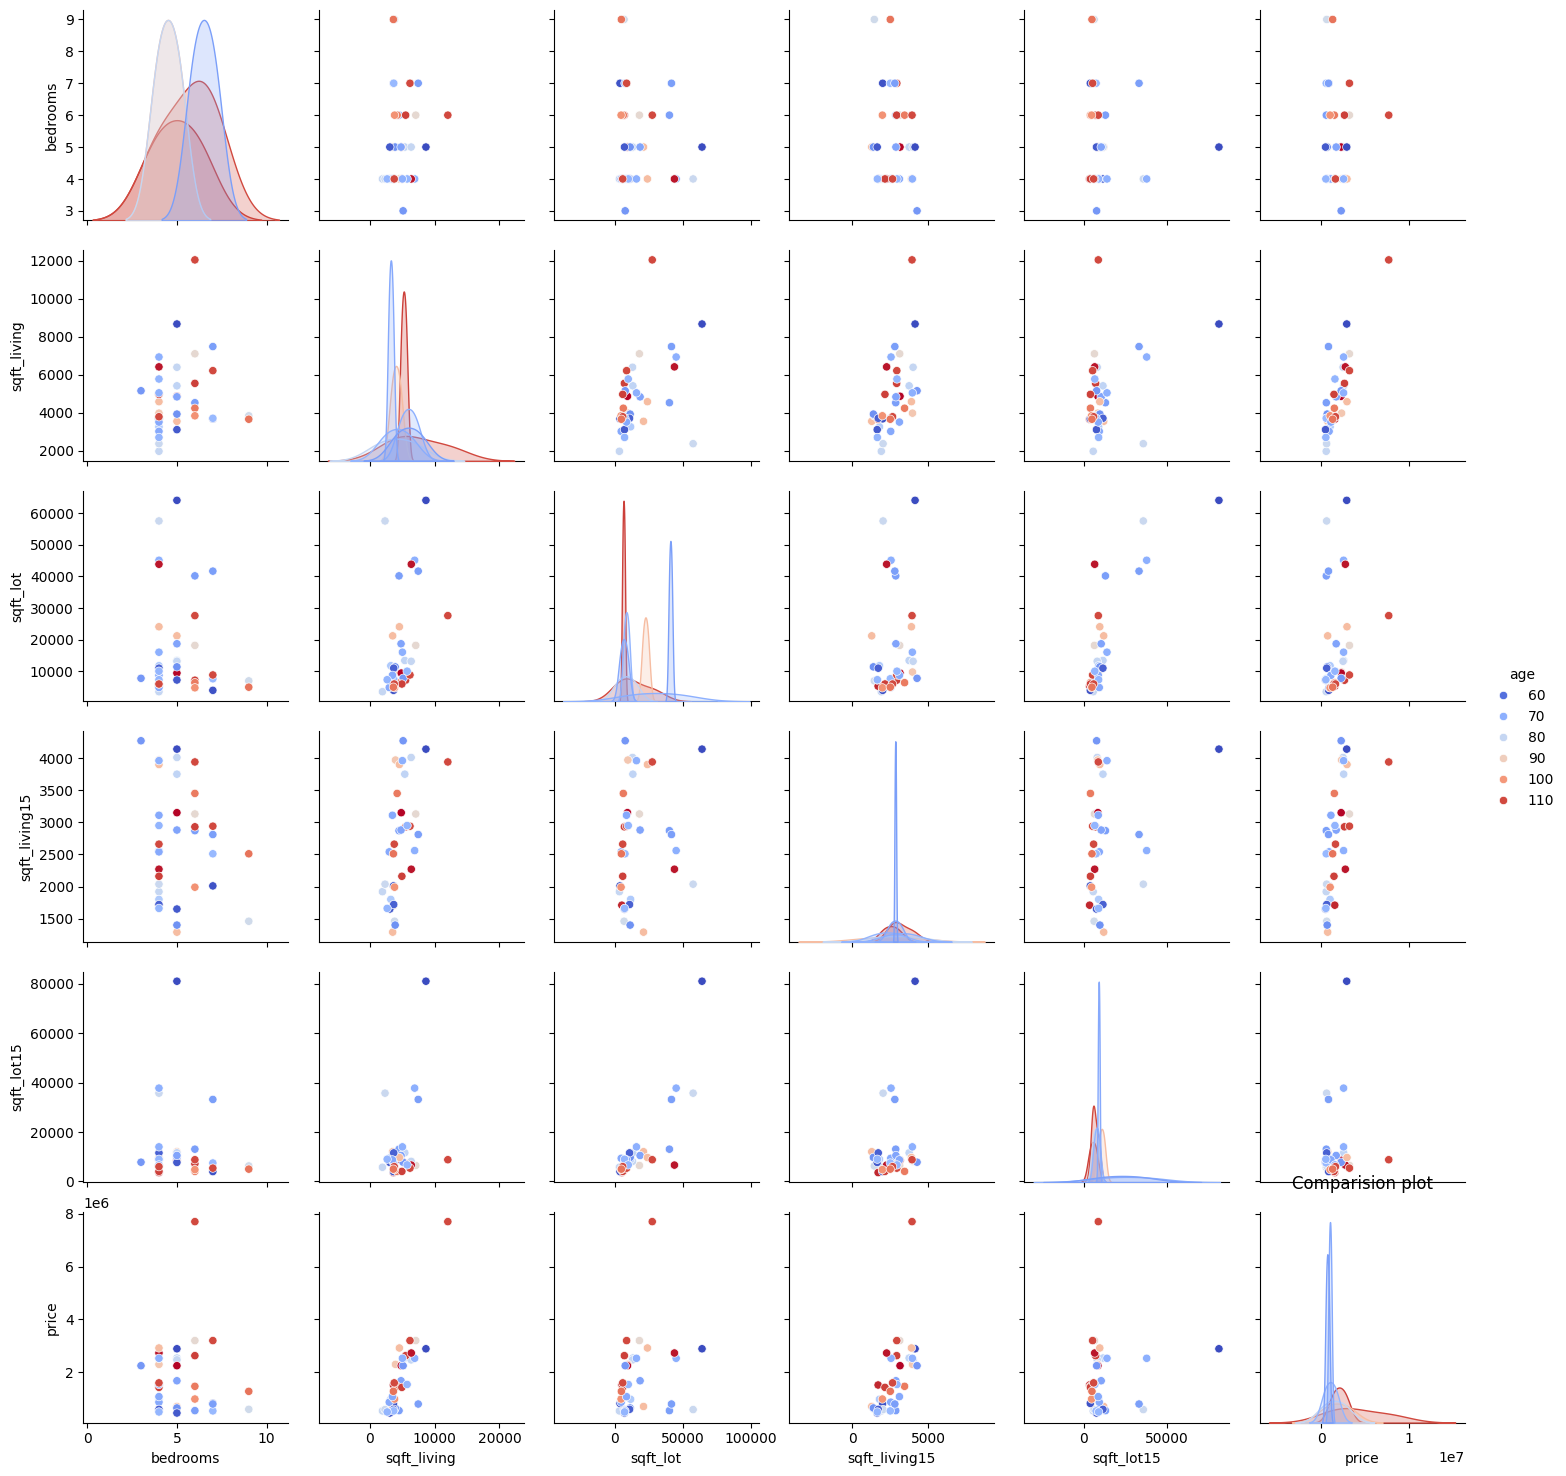

In [149]:
columns_to_plot = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'price', 'age']
#sns.pairplot(df_data_u65[columns_to_plot])
sns.pairplot(df_data_u65[columns_to_plot], hue="age", palette = 'coolwarm' )
plt.title("Comparision plot", fontsize=12)
plt.savefig('paiplot.png', dpi=1000, bbox_inches='tight')
plt.show()


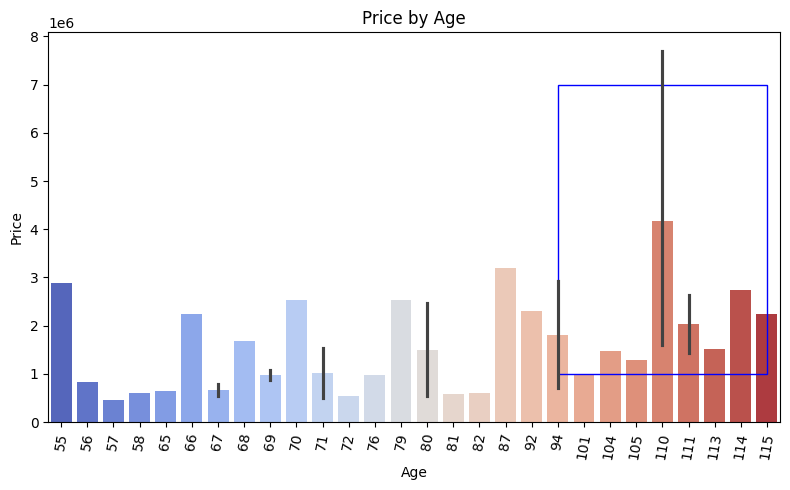

In [38]:
sns.barplot(x='age', y='price', data=df_data_u65, palette="coolwarm")

plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Price by Age')
plt.xticks(rotation=80)
plt.gca().add_patch(plt.Rectangle((19, 1e6), 8, 6e6, color='blue',fill=False, linewidth=1))
plt.tight_layout()
plt.savefig('price_by_age.png', dpi=1000, bbox_inches='tight')
plt.show()





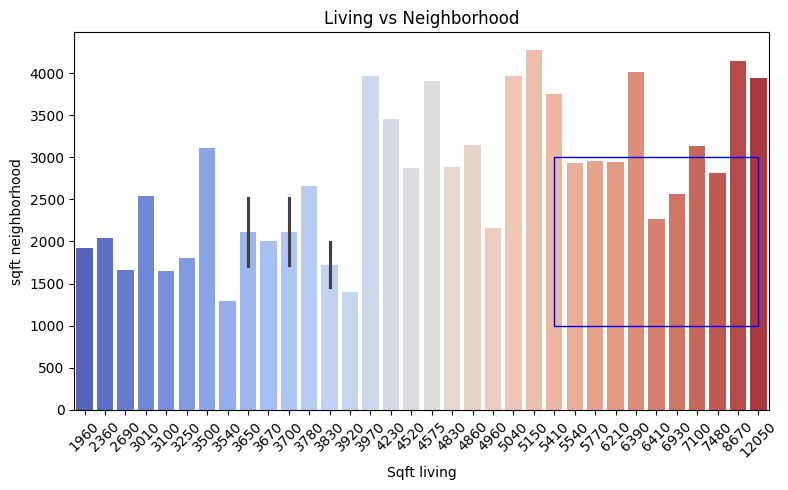

In [142]:

sns.barplot(x='sqft_living', y='sqft_living15', data=df_data_u65, palette='coolwarm')

plt.xlabel('Sqft living')
plt.ylabel('sqft neighborhood')
plt.title('Living vs Neighborhood')
plt.gca().add_patch(plt.Rectangle((23, 1000), 10, 2000, color='blue',fill=False, linewidth=1))

# Rotate x-ticks if necessary
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(' Sqft_Living by neighborhood.png', dpi=1000, bbox_inches='tight')
plt.show()


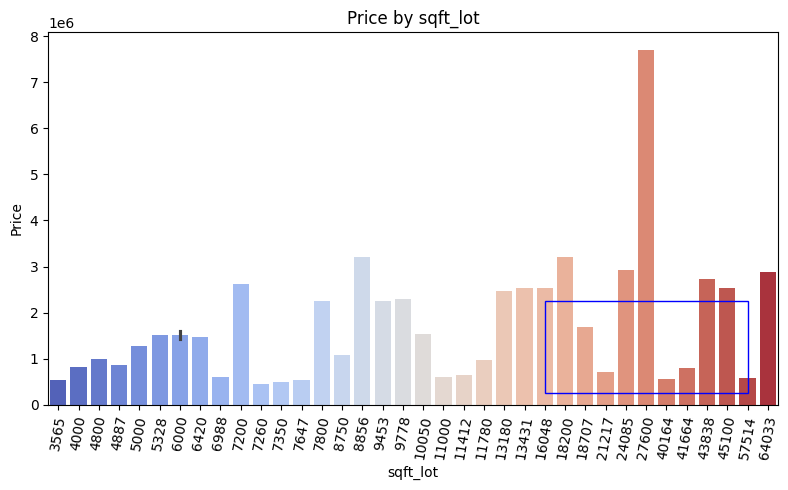

In [39]:

sns.barplot(x='sqft_lot', y='price', data=df_data_u65, palette='coolwarm')

# Add labels and title
plt.xlabel('sqft_lot')
plt.xticks(rotation=80)
plt.ylabel('Price')
plt.title('Price by sqft_lot')

 
plt.gca().add_patch(plt.Rectangle((24, 0.25e6), 10, 2e6, color='blue',fill=False, linewidth=1))  # (x, y), width, height

# Show the plot
plt.tight_layout()
plt.savefig('sqft_lot to price.png', dpi=1000, bbox_inches='tight')
plt.show()



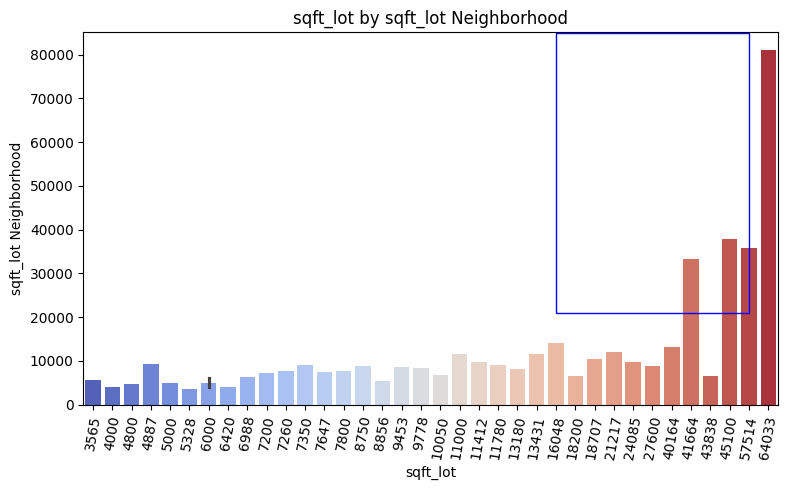

In [114]:

sns.barplot(x='sqft_lot', y='sqft_lot15', data=df_data_u65, palette='coolwarm')

# Add labels and title
plt.xlabel('sqft_lot')
plt.xticks(rotation=80)
plt.ylabel('sqft_lot Neighborhood')
plt.title('sqft_lot by sqft_lot Neighborhood') 
plt.gca().add_patch(plt.Rectangle((24, 21000), 10, 64000, color='blue',fill=False, linewidth=1)) 
plt.tight_layout()
plt.savefig('Sqft_Lot and Lot_Neighborhood.png', dpi=1000, bbox_inches='tight')
plt.show()



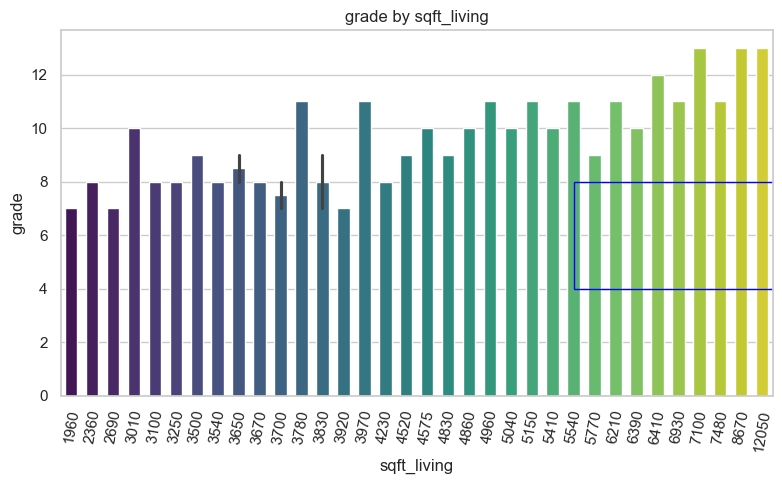

In [272]:
sns.barplot(x='sqft_living', y='grade', width=0.6, data=df_data_u65, palette='viridis')

# Add labels and title
plt.xlabel('sqft_living')
plt.xticks(rotation=80)
plt.ylabel('grade')
plt.title('grade by sqft_living')

 
plt.gca().add_patch(plt.Rectangle((24, 4), 10, 4, color='blue',fill=False, linewidth=1))  # (x, y), width, height
#plt.ylim(0,10)
# Show the plot
plt.tight_layout()
plt.show()

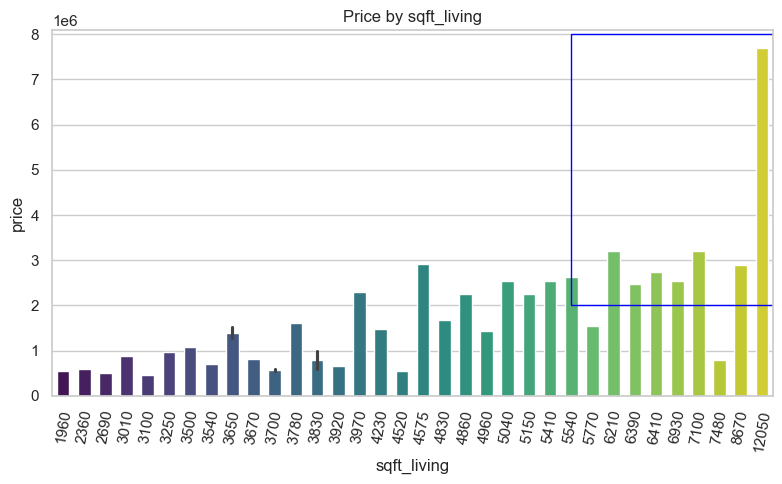

In [284]:
sns.barplot(x='sqft_living', y='price', width=0.6, data=df_data_u65, palette='viridis')

# Add labels and title
plt.xlabel('sqft_living')
plt.xticks(rotation=80)
plt.ylabel('price')
plt.title('Price by sqft_living')

 
plt.gca().add_patch(plt.Rectangle((24, 2e6), 10, 6e6, color='blue',fill=False, linewidth=1))  # (x, y), width, height
#plt.ylim(0,10)
# Show the plot
plt.tight_layout()
plt.show()

In [44]:
price = df_data_u65.groupby('grade')['price'].agg(['mean', 'median']).reset_index()

In [45]:
price

,grade,mean,median
0,7,577899.800,599000.000
1,8,856375.000,765500.000
2,9,1226500.000,1300000.000
3,10,2263333.333,2500000.000
4,11,2092500.000,2275000.000
5,12,2730000.000,2730000.000
6,13,4596666.667,3200000.000


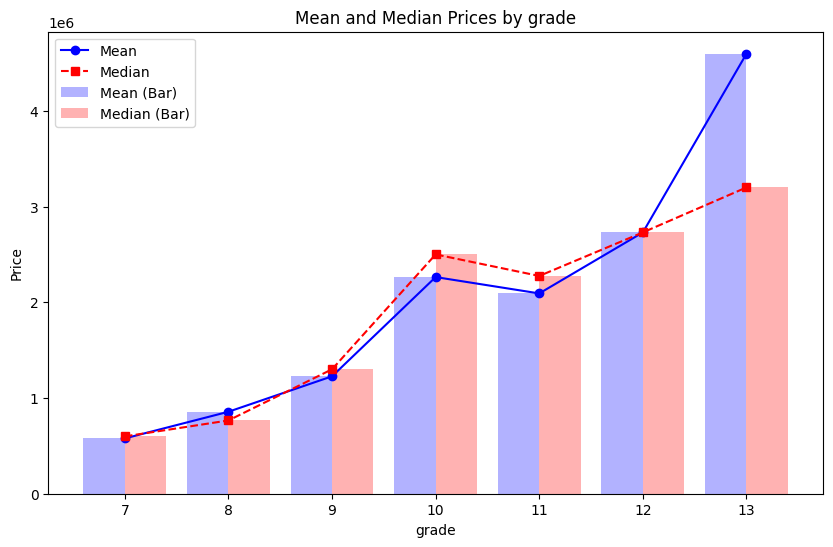

In [47]:

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(price['grade'], price['mean'], label='Mean', marker='o', linestyle='-', color='b')
ax.plot(price['grade'], price['median'], label='Median', marker='s', linestyle='--', color='r')

ax.bar(price['grade'] - 0.2, price['mean'], width=0.4, label='Mean (Bar)', color='b', alpha=0.3)
ax.bar(price['grade'] + 0.2, price['median'], width=0.4, label='Median (Bar)', color='r', alpha=0.3)

ax.set_xlabel('grade')
ax.set_ylabel('Price')
ax.set_title('Mean and Median Prices by grade')
plt.savefig('garde to Mean & Median.png', dpi=1000, bbox_inches='tight')
ax.legend()


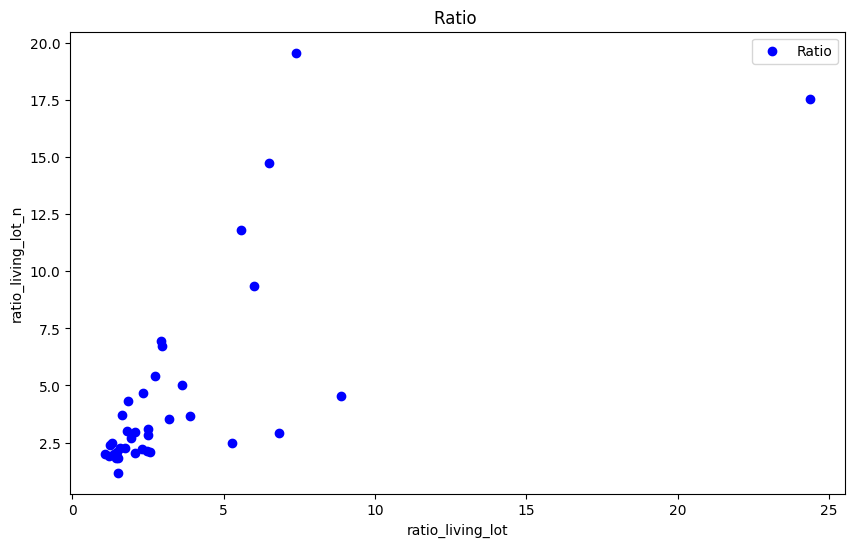

In [147]:

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_data_u65.ratio_living_lot, df_data_u65.ratio_living_lot_n, label='Ratio', color='b')
ax.set_xlabel('ratio_living_lot')
ax.set_ylabel('ratio_living_lot_n')
ax.set_title('Ratio ')
plt.savefig('Ratio of Sqft_Living_lot by living_lot_n.png', dpi=1000, bbox_inches='tight')
ax.legend()


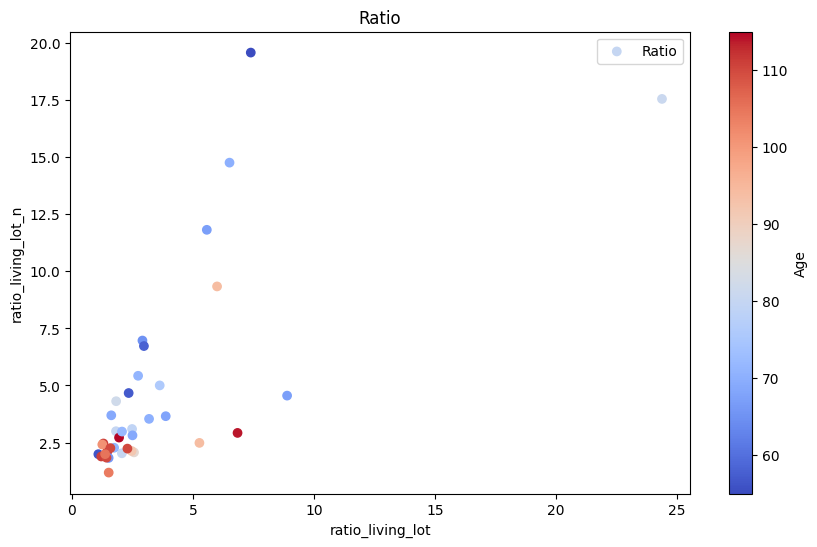

In [151]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(
    df_data_u65.ratio_living_lot, 
    df_data_u65.ratio_living_lot_n, 
    c=df_data_u65.age,
    cmap='coolwarm', 
    label='Ratio'
)
ax.set_xlabel('ratio_living_lot')
ax.set_ylabel('ratio_living_lot_n')
ax.set_title('Ratio')
plt.colorbar(scatter, ax=ax, label='Age')
plt.savefig('Ratio_of_Sqft_Living_lot_by_living_lot_n_colored_by_age.png', dpi=1000, bbox_inches='tight')
ax.legend()
plt.show()

In [85]:
df_data_u40 = df_main[ (df_main.yr_built <=1940)]
df_data_u40['age'] = 2020 - df_data_u40['yr_built']
df_data_u40 = df_data_u40.sort_values('age', ascending= False)
df_data_u40

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,date,id,age
65,1954700695,5.000,4.250,4860.000,9453.000,1.500,0,1.000,5,10,...,1905,98112,47.620,-122.286,3150.000,8557.000,2250000.000,2014-06-12,780,115
150,5249800010,4.000,4.250,6410.000,43838.000,2.500,0,2.000,4,12,...,1906,98144,47.570,-122.280,2270.000,6630.000,2730000.000,2014-12-03,5962,114
84,2397100705,4.000,4.250,3650.000,5328.000,1.500,0,0.000,3,9,...,2014,98119,47.638,-122.362,1710.000,3600.000,1520000.000,2014-07-14,19262,113
85,2397101606,6.000,4.750,5540.000,7200.000,2.500,0,2.000,4,11,...,1909,98119,47.636,-122.366,2930.000,7200.000,2630000.000,2014-12-08,18395,111
173,6819100020,4.000,4.250,4960.000,6000.000,2.500,0,0.000,3,11,...,2003,98109,47.644,-122.356,2160.000,4080.000,1430000.000,2014-05-29,17388,111
178,7159200005,7.000,4.500,6210.000,8856.000,2.500,0,2.000,5,11,...,1910,98109,47.631,-122.354,2940.000,5400.000,3200000.000,2014-05-07,7185,110
214,9272200090,4.000,4.500,3780.000,6000.000,2.000,0,4.000,4,11,...,1977,98116,47.592,-122.388,2660.000,6000.000,1600000.000,2015-02-04,3583,110
171,6762700020,6.000,8.000,12050.000,27600.000,2.500,0,3.000,4,13,...,1987,98102,47.630,-122.323,3940.000,8800.000,7700000.000,2014-10-13,7246,110
220,9822700190,9.000,4.500,3650.000,5000.000,2.000,0,0.000,3,8,...,2010,98105,47.660,-122.289,2510.000,5000.000,1280000.000,2014-08-08,6074,105
165,6169900580,6.000,4.500,4230.000,6420.000,2.000,0,3.000,4,8,...,1916,98119,47.630,-122.369,3450.000,4085.000,1470000.000,2014-07-09,7662,104


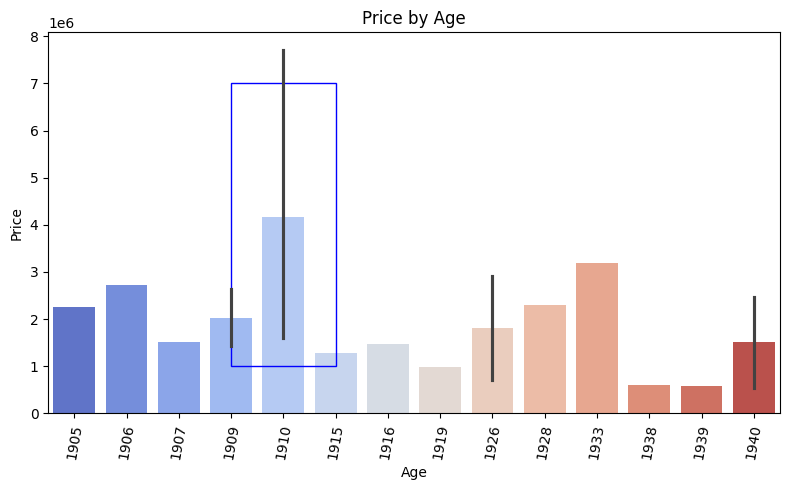

In [88]:
sns.barplot(x='yr_built', y='price', data=df_data_u40, palette="coolwarm")

plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Price by Age')
plt.xticks(rotation=80)
plt.gca().add_patch(plt.Rectangle((3, 1e6), 2, 6e6, color='blue',fill=False, linewidth=1))
plt.tight_layout()
plt.show()

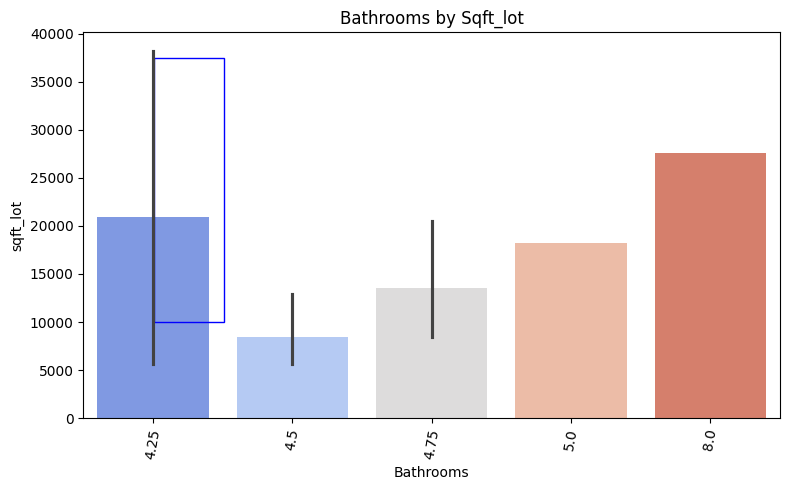

In [77]:
sns.barplot(x='bathrooms', y='sqft_lot', data=df_data_u40, palette="coolwarm")

plt.xlabel('Bathrooms')
plt.ylabel('sqft_lot')
plt.title('Bathrooms by Sqft_lot')
plt.xticks(rotation=80)
plt.gca().add_patch(plt.Rectangle((0.01, 10000), 0.5, 27500, color='blue',fill=False, linewidth=1))
plt.tight_layout()
plt.show()

In [121]:

df_selected = df_data_u40.iloc[[7, 1, 16]].sort_values('age', ascending= False)
df_selected

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,date,id,age
150,5249800010,4.000,4.250,6410.000,43838.000,2.500,0,2.000,4,12,...,1906,98144,47.570,-122.280,2270.000,6630.000,2730000.000,2014-12-03,5962,114
171,6762700020,6.000,8.000,12050.000,27600.000,2.500,0,3.000,4,13,...,1987,98102,47.630,-122.323,3940.000,8800.000,7700000.000,2014-10-13,7246,110
102,2821049048,4.000,4.250,2360.000,57514.000,2.000,0,0.000,4,8,...,1939,98003,47.284,-122.294,2037.000,35733.000,590000.000,2014-06-03,3315,81


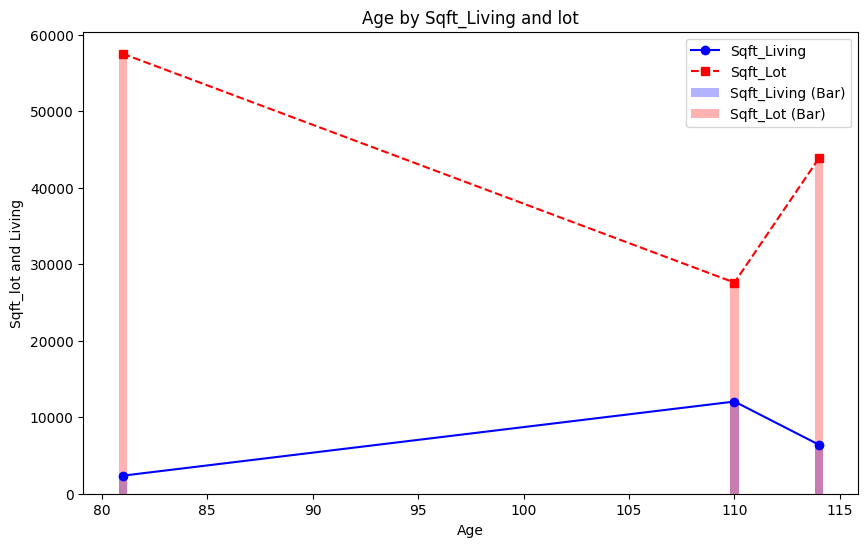

In [98]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_selected.age, df_selected.sqft_living, label='Sqft_Living', marker='o', linestyle='-', color='b')
ax.plot(df_selected.age, df_selected.sqft_lot, label='Sqft_Lot', marker='s', linestyle='--', color='r')

ax.bar(df_selected.age, df_selected.sqft_living, width=0.4, label='Sqft_Living (Bar)', color='b', alpha=0.3)
ax.bar(df_selected.age, df_selected.sqft_lot, width=0.4, label='Sqft_Lot (Bar)', color='r', alpha=0.3)

ax.set_xlabel('Age')
ax.set_ylabel('Sqft_lot and Living')
ax.set_title('Age by Sqft_Living and lot')
plt.savefig('Age by Sqft_Living and lot.png', dpi=1000, bbox_inches='tight')
ax.legend()

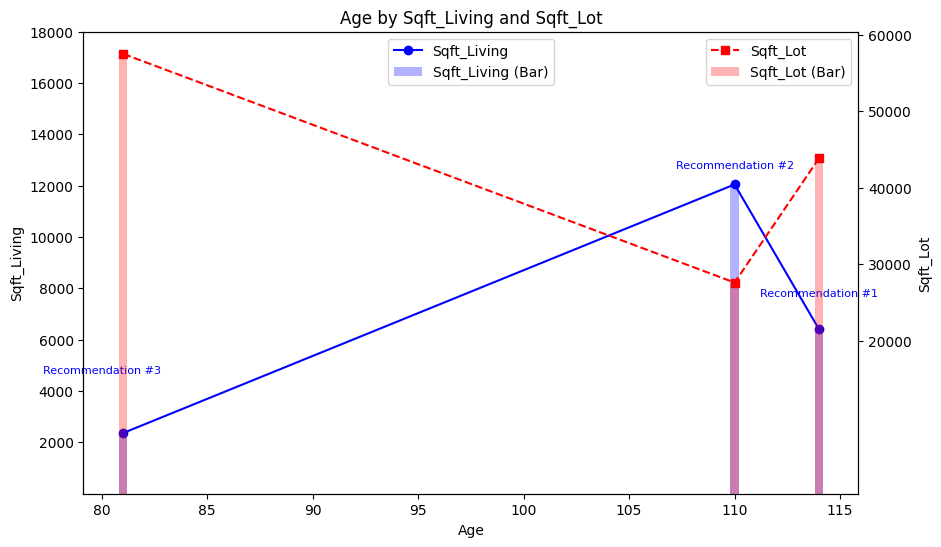

In [134]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Sqft_Living
ax1.plot(df_selected.age, df_selected.sqft_living, label='Sqft_Living', marker='o', linestyle='-', color='b')
ax1.bar(df_selected.age, df_selected.sqft_living, width=0.4, label='Sqft_Living (Bar)', color='b', alpha=0.3)

y_ticks_living = np.arange(2000, 20000, 2000)  # Adjust the range and step based on your data
ax1.set_yticks(y_ticks_living)
ax1.set_xlabel('Age')
ax1.set_ylabel('Sqft_Living')
ax1.set_title('Age by Sqft_Living and Sqft_Lot')

# Add custom text at specific points on the Sqft_Living plot
ax1.text(80, 5000, 'Recommendation #3', fontsize=8, color='blue',ha='center', va='top')
ax1.text(114, 8010, 'Recommendation #1', fontsize=8, color='blue', ha='center', va='top')
ax1.text(110, 13000, 'Recommendation #2', fontsize=8, color='blue', ha='center', va='top')
ax2 = ax1.twinx()

# Plotting Sqft_Lot
ax2.plot(df_selected.age, df_selected.sqft_lot, label='Sqft_Lot', marker='s', linestyle='--', color='r')
ax2.bar(df_selected.age, df_selected.sqft_lot, width=0.4, label='Sqft_Lot (Bar)', color='r', alpha=0.3)
y_ticks_lot = np.arange(20000, 65000, 10000)
ax2.set_yticks(y_ticks_lot)
ax2.set_ylabel('Sqft_Lot')
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')
plt.savefig('Age_by_Sqft_Living_and_Lot_with_custom_text.png', dpi=1000, bbox_inches='tight')

# Show the plot
plt.show()



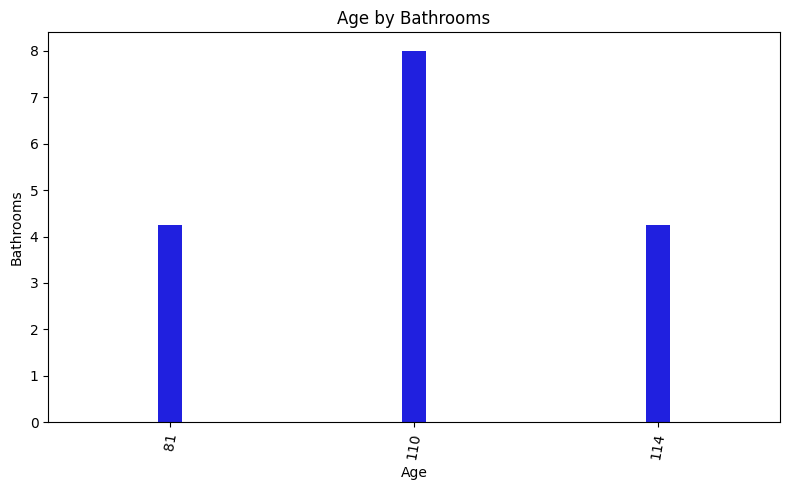

In [123]:
sns.barplot(x=df_selected.age, y=df_selected.bathrooms, width=0.1, data=df_selected, color='b')
plt.xlabel('Age')
plt.ylabel('Bathrooms')
plt.title('Age by Bathrooms')
plt.xticks(rotation=80)
plt.tight_layout()
plt.savefig('bathrooms and age', dpi=1000, bbox_inches='tight')
plt.show()

In [109]:
avg_latitude = df_selected['lat'].mean() 
avg_longitude = df_selected['long'].mean()
import geojson
import plotly.express as px

url_geojson = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/refs/heads/master/wa_washington_zip_codes_geo.min.json"
fig = px.choropleth_mapbox(df_selected, 
                           geojson=url_geojson, 
                           locations='zipcode', featureidkey='properties.ZCTA5CE10',
                           color='price',
                           mapbox_style="carto-positron",
                           zoom=8, center={"lat": avg_latitude, "lon": avg_longitude},
                           opacity=0.5,
                           height=400,
                           width=600, 
                          )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig2 = px.scatter_mapbox(df_selected, lat="lat", lon="long", color_discrete_sequence=["green"], zoom=3, height=400, width= 600, hover_data='price')
fig2.update_layout(mapbox_style="open-street-map")
fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
for trace in fig2.data:
    fig.add_trace(trace)
fig.write_html("highlighted_map.html")
fig.show()

# Recomendations to clients


### House Recommendation 1:

House ID: 6762700020
Location: 98102, Seattle, WA
Price: $7,700,000
Date Listed: 2014-10-13
Age: 110 years

This elegant 6-bedroom, 8-bathroom estate spans an impressive 12,050 sq ft of living space and sits on a large 27,600 sq ft lot. The property boasts 2.5 floors and is graded with a high 13, indicating superior quality construction. The home is situated in a neighborhood where the average lot size for the 15 closest homes is 8,800 sq ft, making this residence one of the largest and most expansive in the area.

While it does not have a waterfront view, this mansion offers abundant space, privacy, and luxuries like golf, tennise court and pool. Its impressive size is complemented by the neighboring home, which features 3,940 sq ft of living space. Built in 1987 and well-maintained, this house offers a perfect blend of vintage charm and modern comfort, making it a perfect fit for grand living spaces and an elite neighborhood.


### House Recommendation 2:
House ID: 5249800010
Location: 98144, Seattle, WA
Price: $2,730,000
Date Listed: 2014-12-03
Age: 114 years

This beautifully maintained 4-bedroom, 4.25-bathroom home spans 6,410 sq ft of living space and is situated on a generous 43,838 sq ft lot. Featuring 2.5 floors, the home provides a sense of openness with ample space for entertaining and family living. The property is rated Grade 12, reflecting high-quality finishes and upkeep, making it a prime example of luxurious living.

While it lacks a waterfront view, it is positioned in a neighborhood with a large variety of homes. The average lot size for the 15 nearest homes is 6,630 sq ft, ensuring a balance of space and privacy. Built in 1906, this home offers a perfect mix of classic architecture and modern updates, with the added bonus of proximity to downtown Seattle. A true gem for those seeking a historic home with contemporary comforts.


### House Recommendation 3:

House ID: 2821049048
Location: 98003, Federal Way, WA
Price: $590,000
Date Listed: 2014-06-03
Age: 81 years

This charming 4-bedroom, 4.25-bathroom home offers a comfortable 2,360 sq ft of living space on a generous 57,514 sq ft lot. Spread across two floors, this property offers ample living area and a large lot, providing plenty of room for outdoor activities or future expansion. The home has a Grade 8 rating, indicating it is in excellent condition with a solid foundation.

The surrounding neighborhood features homes with larger lots, and the average lot size for the 15 closest homes is 35,733 sq ft. Though not a waterfront property, the expansive lot gives plenty of room for privacy and recreation. Built in 1939, this home brings a sense of history and timeless appeal, while offering modern comforts. With its prime location and proximity to Federal Way, this is an ideal home for families seeking space and comfort.

